In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import datetime

In [2]:
file_paths = [
    'NIFTY 50-08-07-2019-to-08-07-2020.csv',
    'NIFTY 50-08-07-2020-to-08-07-2021.csv',
    'NIFTY 50-08-07-2021-to-08-07-2022.csv',
    'NIFTY 50-08-07-2022-to-08-07-2023.csv',
    'NIFTY 50-08-07-2023-to-08-07-2024.csv']

dfs = [pd.read_csv(file) for file in file_paths]

data = pd.concat(dfs, ignore_index=True)

In [3]:
data=dfs[0]
data.rename(columns={"Date ":"Date"}, inplace=True)
data.head()    

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,08-JUL-2019,11770.40,11771.90,11523.30,11558.6,464029444,19146.25
1,09-JUL-2019,11531.60,11582.55,11461.00,11555.9,442520253,21577.95
2,10-JUL-2019,11536.15,11593.70,11475.65,11498.9,337571014,16098.53
3,11-JUL-2019,11561.45,11599.00,11519.50,11582.9,317257578,14586.20
4,12-JUL-2019,11601.15,11639.55,11538.60,11552.5,359421182,16947.57


In [47]:
data['Date'] = pd.to_datetime(data['Date'])

In [48]:
data.columns = ['Turnover' if col == 'Turnover (₹ Cr)' else col for col in data.columns]

# Display the DataFrame
print(data.head())

        Date      Open      High       Low    Close  Shares Traded  Turnover
0 2019-07-08  11770.40  11771.90  11523.30  11558.6    464029444.0  19146.25
1 2019-07-09  11531.60  11582.55  11461.00  11555.9    442520253.0  21577.95
2 2019-07-10  11536.15  11593.70  11475.65  11498.9    337571014.0  16098.53
3 2019-07-11  11561.45  11599.00  11519.50  11582.9    317257578.0  14586.20
4 2019-07-12  11601.15  11639.55  11538.60  11552.5    359421182.0  16947.57


In [49]:
data.columns=data.columns.str.strip()

In [50]:
print('Date'in data.columns)

True


In [51]:
data.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover'], dtype='object')

In [52]:
data.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Shares Traded    0
Turnover         0
dtype: int64

In [53]:
data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover
0,2019-07-08,11770.40,11771.90,11523.30,11558.6,464029444.0,19146.25
1,2019-07-09,11531.60,11582.55,11461.00,11555.9,442520253.0,21577.95
2,2019-07-10,11536.15,11593.70,11475.65,11498.9,337571014.0,16098.53
3,2019-07-11,11561.45,11599.00,11519.50,11582.9,317257578.0,14586.20
4,2019-07-12,11601.15,11639.55,11538.60,11552.5,359421182.0,16947.57


In [54]:
data['Date'] = data['Date'].astype(str)


In [55]:
data['Date'] = data['Date'].str.replace('[- ]', '', regex=True)

In [56]:
data.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover
242,20200702,10493.05,10598.20,10485.55,10551.70,597423931.0,31235.17
243,20200703,10614.95,10631.30,10562.65,10607.35,525190704.0,25186.39
244,20200706,10723.85,10811.40,10695.10,10763.65,571212914.0,29857.54
245,20200707,10802.85,10813.80,10689.70,10799.65,636764929.0,36502.37
246,20200708,10818.65,10847.85,10676.55,10705.75,767941333.0,37676.34


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           247 non-null    object 
 1   Open           247 non-null    float64
 2   High           247 non-null    float64
 3   Low            247 non-null    float64
 4   Close          247 non-null    float64
 5   Shares Traded  247 non-null    float64
 6   Turnover       247 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.6+ KB


In [58]:

data['Shares Traded'] = data['Shares Traded'].astype(float)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           247 non-null    object 
 1   Open           247 non-null    float64
 2   High           247 non-null    float64
 3   Low            247 non-null    float64
 4   Close          247 non-null    float64
 5   Shares Traded  247 non-null    float64
 6   Turnover       247 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.6+ KB


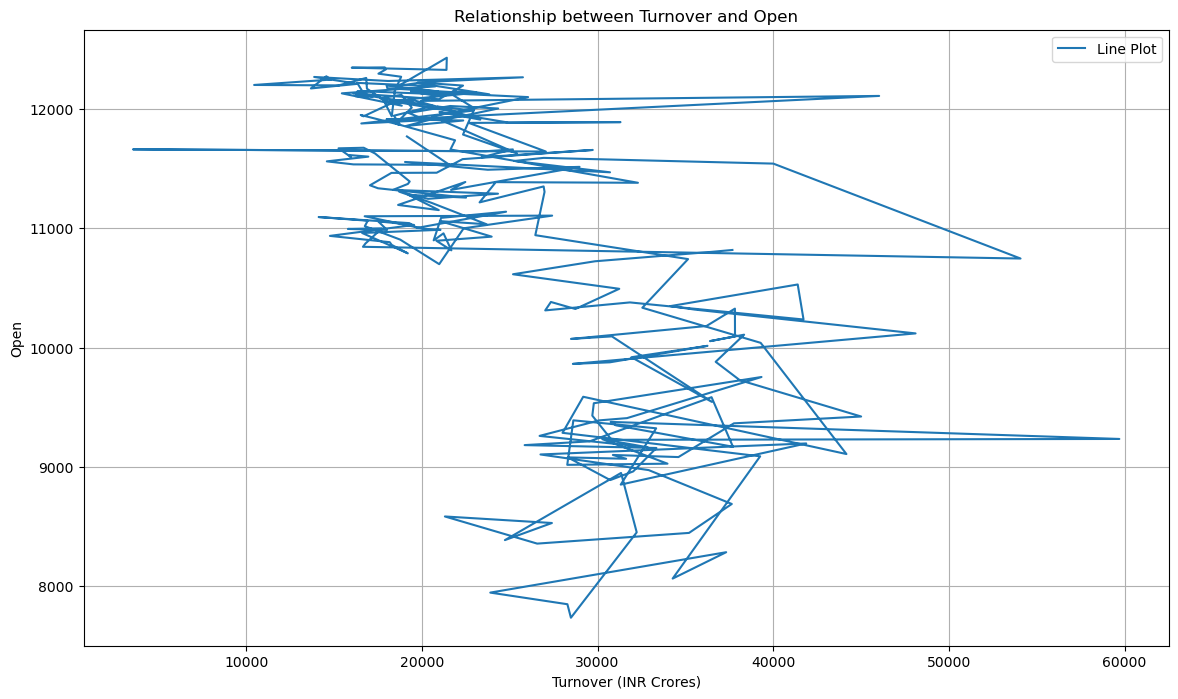

In [60]:
turnover = data['Turnover']
open_prices = data['Open']

# Create the plot
plt.figure(figsize=(14, 8))
plt.plot(turnover, open_prices, label='Line Plot')
plt.xlabel("Turnover (INR Crores)")
plt.ylabel('Open')
plt.title('Relationship between Turnover and Open')
plt.legend()
plt.grid(True)
plt.show()

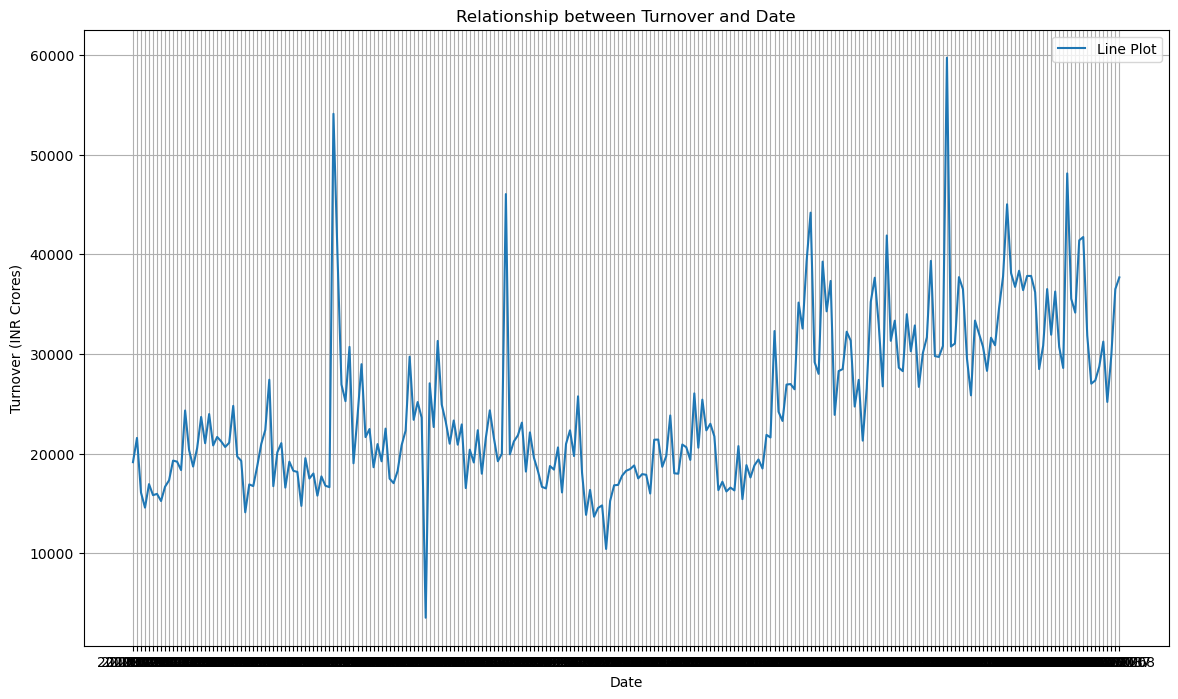

In [61]:
turnover = data['Turnover']
open_prices = data['Date']


 
 
# Create the plot
plt.figure(figsize=(14, 8))
plt.plot(open_prices, turnover, label='Line Plot')
plt.ylabel("Turnover (INR Crores)")
plt.xlabel('Date')
plt.title('Relationship between Turnover and Date')
plt.legend()
plt.grid(True)
plt.show()

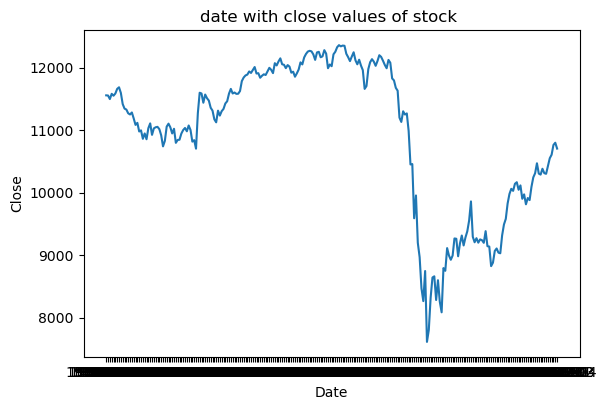

In [62]:
import matplotlib.dates as mdates
plt.gcf().autofmt_xdate()  # Automatically rotates the date labels to fit

# Set the date format on the x-axis
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

# Set labels and title
Date=data['Date']
Close=data['Close']
plt.plot(Date, Close, label='Line Plot')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('date with close values of stock ')

# Show the plot
plt.show()

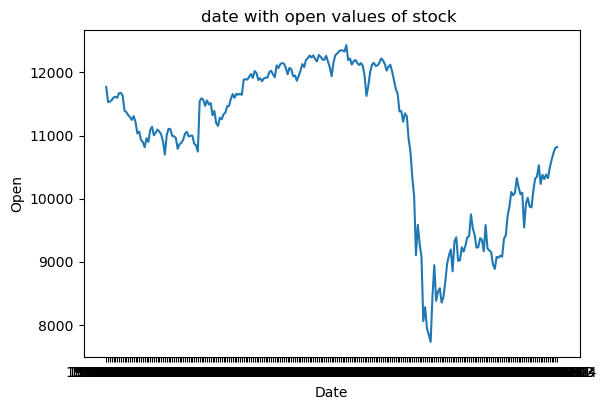

In [63]:
import matplotlib.dates as mdates
plt.gcf().autofmt_xdate()  # Automatically rotates the date labels to fit

# Set the date format on the x-axis
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)

# Set labels and title
Date=data['Date']
Open=data['Open']
plt.plot(Date, Open, label='Line Plot')
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('date with open values of stock ')

# Show the plot
plt.show()

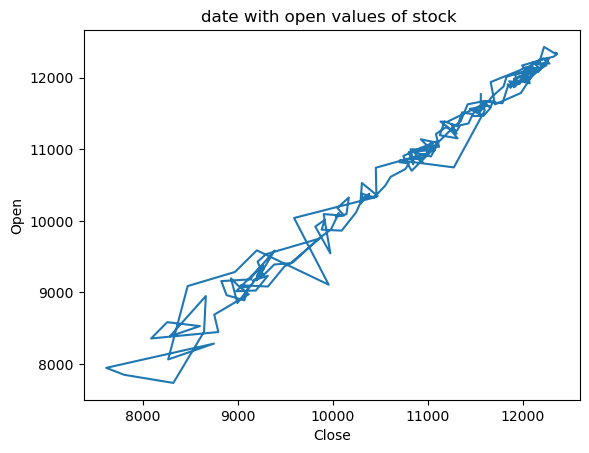

In [64]:
Date=data['Close']
Open=data['Open']
plt.plot(Close, Open, label='Line Plot')
plt.xlabel('Close')
plt.ylabel('Open')
plt.title('date with open values of stock ')

# Show the plot
plt.show()

In [65]:
import numpy as np
import pandas as pd

def systematic_sampling(data, sample_size):
    population_size = len(data)
    
    # Ensure sample size is not larger than the population size
    if sample_size >= population_size:
        raise ValueError("Sample size must be smaller than the population size.")
    
    interval = population_size // sample_size
    
    # Ensure interval is not zero
    if interval == 0:
        raise ValueError("Interval calculated as zero. Ensure population size is much larger than sample size.")
    
    start = np.random.randint(0, interval)
    
    indices = [i for i in range(start, population_size, interval)]
    sampled_df = data.iloc[indices]
    return sampled_df

In [66]:
sample_size = 100

# Take samples using systematic sampling
sampled_df = systematic_sampling(data, sample_size)

print("Sampled DataFrame:")
sampled_df

Sampled DataFrame:


,Date,Open,High,Low,Close,Shares Traded,Turnover
1,20190709,11531.60,11582.55,11461.00,11555.90,442520253.0,21577.95
3,20190711,11561.45,11599.00,11519.50,11582.90,317257578.0,14586.20
5,20190715,11614.75,11618.40,11532.30,11588.35,368788782.0,15835.99
7,20190717,11670.75,11706.65,11651.15,11687.50,464827734.0,15250.50
9,20190719,11627.95,11640.35,11399.30,11419.25,446049198.0,17326.40
...,...,...,...,...,...,...,...
237,20200625,10235.55,10361.80,10194.50,10288.90,994190886.0,41726.07
239,20200629,10311.95,10337.95,10223.60,10312.40,574544482.0,27019.46
241,20200701,10323.80,10447.05,10299.60,10430.05,573550127.0,28736.28
243,20200703,10614.95,10631.30,10562.65,10607.35,525190704.0,25186.39


In [67]:
sampled_df.describe()

,Open,High,Low,Close,Shares Traded,Turnover
count,123.000000,123.000000,123.000000,123.000000,1.230000e+02,123.000000
mean,10950.693902,11029.547561,10844.123984,10934.133740,6.587352e+08,24651.945935
std,1196.444889,1140.435525,1227.966358,1183.923079,2.172050e+08,8389.679286
min,7735.150000,8159.250000,7583.600000,7610.250000,1.617790e+08,3548.210000
25%,10113.650000,10225.100000,10038.150000,10101.850000,5.220227e+08,18735.150000
50%,11307.500000,11361.400000,11152.400000,11251.000000,6.319521e+08,22341.060000
75%,11958.900000,12011.425000,11886.175000,11946.650000,7.360893e+08,29336.460000
max,12430.500000,12430.500000,12315.800000,12362.300000,1.811564e+09,59705.530000


In [68]:
data.describe()

,Open,High,Low,Close,Shares Traded,Turnover
count,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,10950.114372,11026.880972,10846.694332,10933.842713,6.646792e+08,24680.322915
std,1182.351690,1134.655252,1222.514754,1178.510957,2.238885e+08,8122.273114
min,7735.150000,8036.950000,7511.100000,7610.250000,1.617790e+08,3548.210000
25%,10101.200000,10177.000000,10036.200000,10103.900000,5.152033e+08,18576.095000
50%,11290.400000,11359.750000,11158.350000,11252.150000,6.246346e+08,22315.990000
75%,11958.900000,12014.950000,11888.800000,11951.700000,7.534173e+08,29974.475000
max,12430.500000,12430.500000,12321.400000,12362.300000,1.811564e+09,59705.530000


<Axes: >

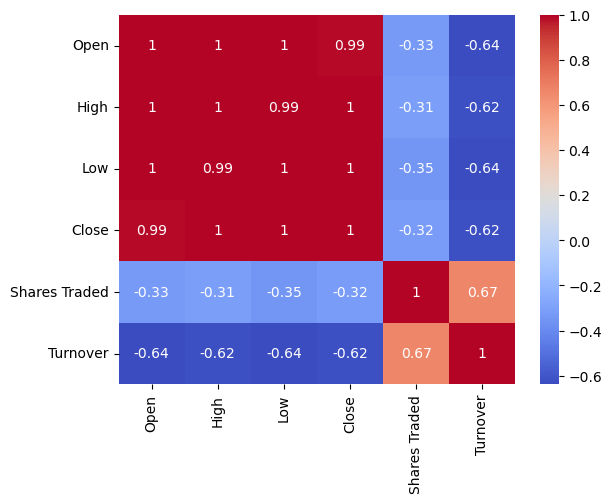

In [71]:
plt.figure()
sns.heatmap(data.select_dtypes("number").corr(), annot=True, cmap='coolwarm')

<Axes: >

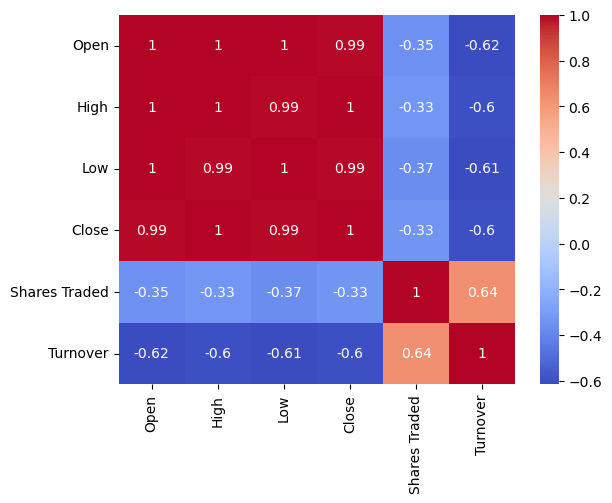

In [72]:
plt.figure()
sns.heatmap(sampled_df.select_dtypes("number").corr(), annot=True, cmap='coolwarm')

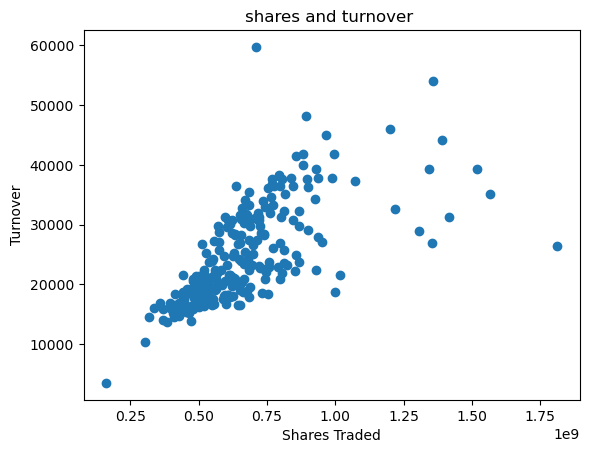

In [74]:
Share=data['Shares Traded']
Turnover=data['Turnover']
plt.scatter(Share, Turnover, label='Dot')
plt.xlabel('Shares Traded')
plt.ylabel('Turnover')
plt.title('shares and turnover ')

# Show the plot
plt.show()

# forecasting steps 


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [77]:
result = adfuller(data['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


#as thr threshold value is 0.05 then this test suggest that our data is not stationary 

ADF Statistic: -1.720670
p-value: 0.420495


In [78]:
# perfoming log transformation for converting our non stationary data into stationary 
# Log transform
data['Close_log'] = np.log(data['Close'])

# First difference of the log-transformed data
data['Close_log_diff'] = data['Close_log'] - data['Close_log'].shift(1)

# Drop the NaN values that are created by the shift operation
data.dropna(inplace=True)

# Check the result
print(data[['Close', 'Close_log', 'Close_log_diff']].head())

# Perform the ADF test again on the log differenced data
result = adfuller(data['Close_log_diff'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


      Close  Close_log  Close_log_diff
1  11555.90   9.354951       -0.000234
2  11498.90   9.350007       -0.004945
3  11582.90   9.357285        0.007278
4  11552.50   9.354657       -0.002628
5  11588.35   9.357756        0.003098
ADF Statistic: -4.525394
p-value: 0.000177


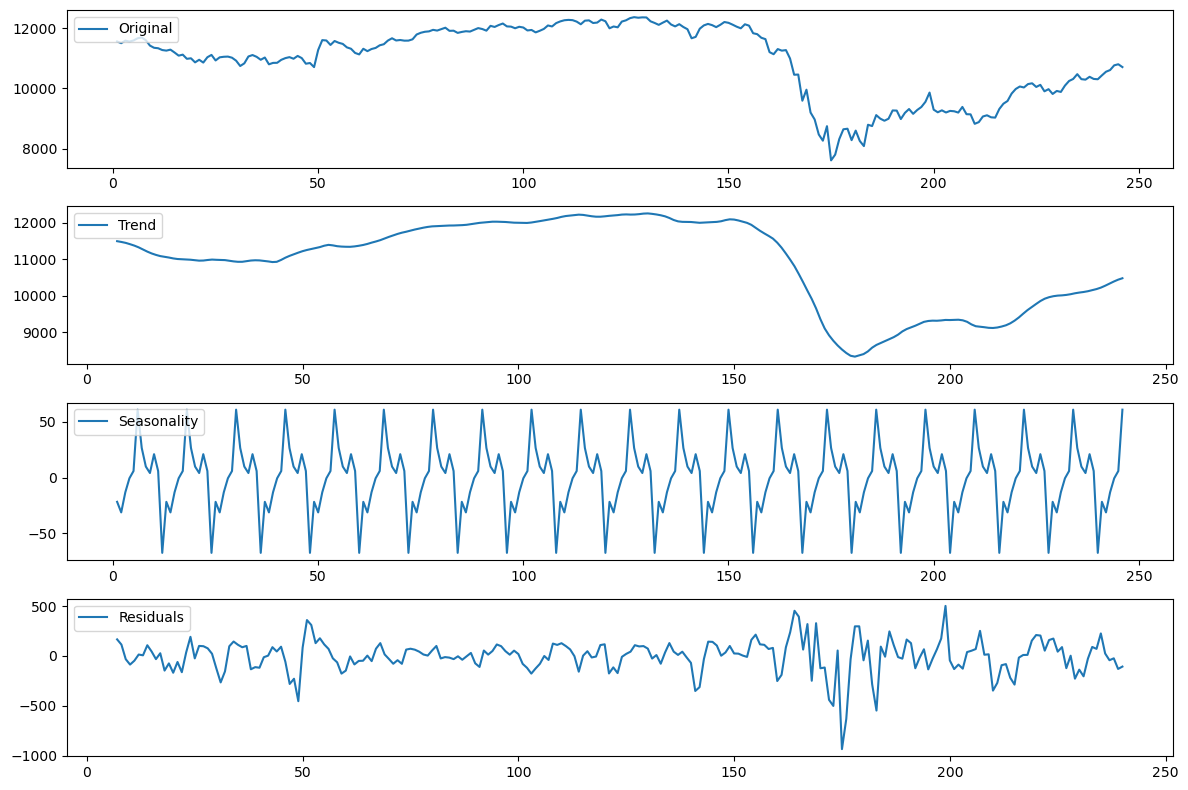

In [79]:
#performing additive decomposition for removing the sesonal and residual components 
result = seasonal_decompose(data['Close'], model='additive', period=12)  # Assuming seasonality period is 12 (monthly data)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

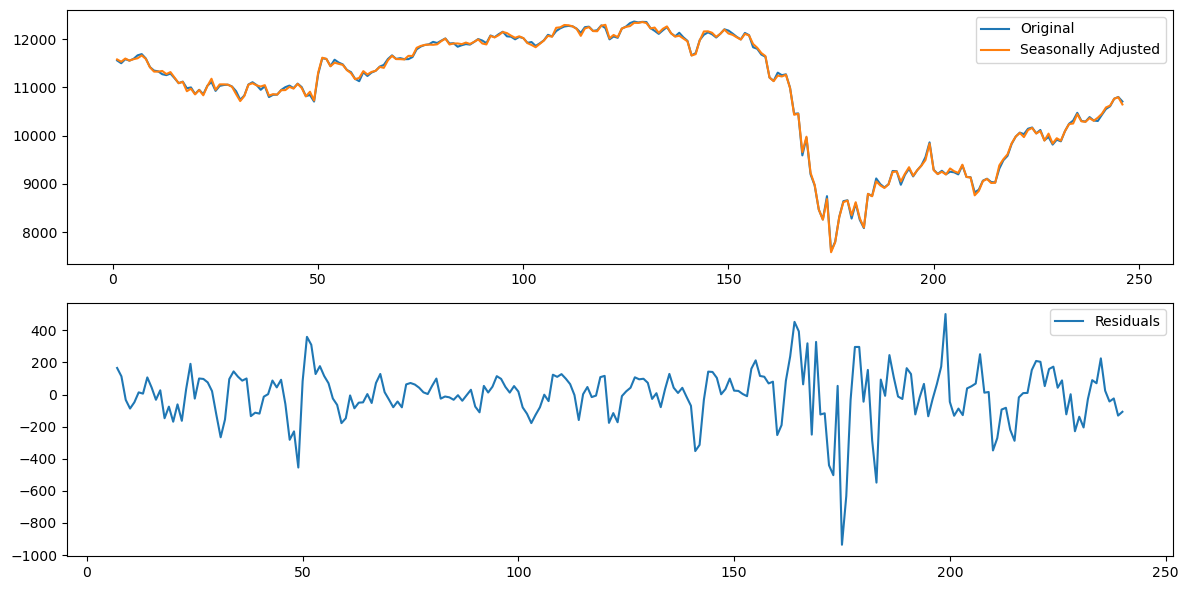

In [80]:
# Handle seasonal component
seasonally_adjusted = data['Close'] - result.seasonal

# Handle residual component
residuals = result.resid

# Further analysis or visualization of components
# For example, plotting the seasonally adjusted series and residuals
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(data['Close'], label='Original')
plt.plot(seasonally_adjusted, label='Seasonally Adjusted')
plt.legend()

plt.subplot(212)
plt.plot(residuals, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

In [81]:
# Example: Extracting 'Close' prices from the DataFrame
close_prices = data['Close'].dropna()


In [82]:
# Example: Applying simple exponential smoothing
model = ExponentialSmoothing(close_prices)
result = model.fit()


/Users/charulpatel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [83]:
smoothed_values = result.fittedvalues


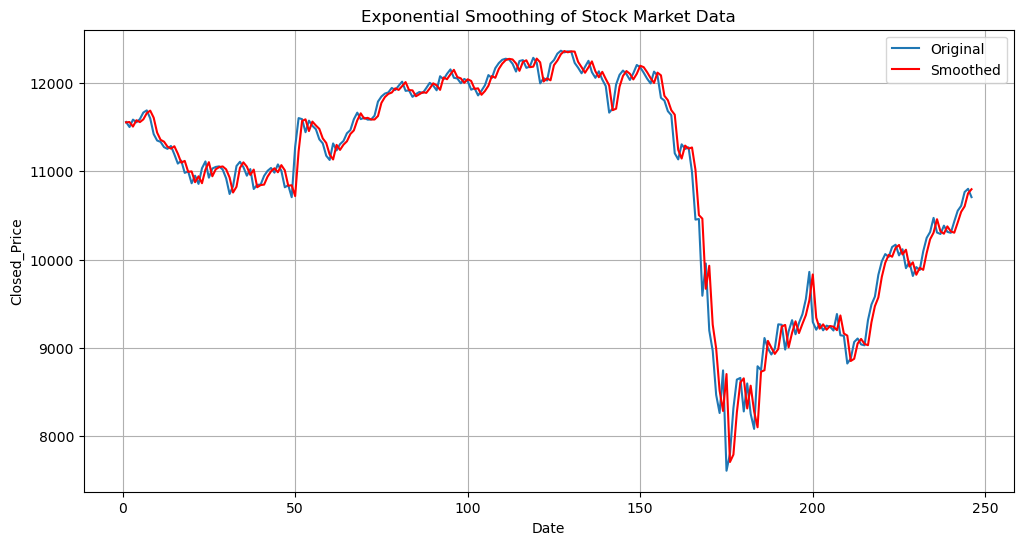

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='Original')
plt.plot(smoothed_values, label='Smoothed', color='red')
plt.title('Exponential Smoothing of Stock Market Data')
plt.xlabel('Date')
plt.ylabel('Closed_Price')
plt.legend()
plt.grid(True)
plt.show()


In [86]:
# Extract the closing prices
close_prices = data['Close']

In [87]:
# Applying Holt-Winters Exponential Smoothing
hw_model = ExponentialSmoothing(close_prices, trend='add', seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()

# Extract the fitted values
fitted_values = hw_fit.fittedvalues

/Users/charulpatel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


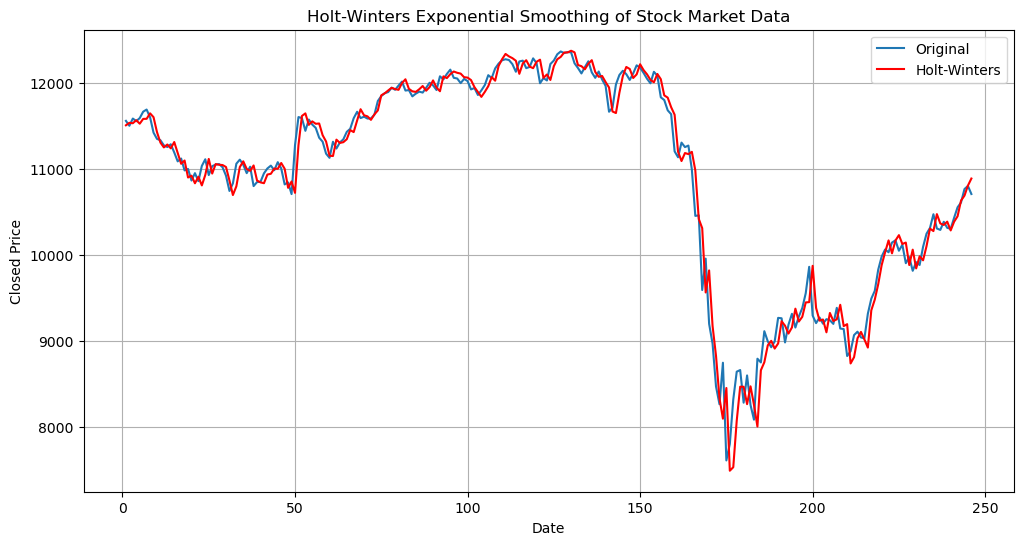

In [88]:
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='Original')
plt.plot(fitted_values, label='Holt-Winters', color='red')
plt.title('Holt-Winters Exponential Smoothing of Stock Market Data')
plt.xlabel('Date')
plt.ylabel('Closed Price')
plt.legend()
plt.grid(True)
plt.show()

# used for double triple smoothning of the data so as to analyze the trend more accurately 

<Figure size 1200x600 with 0 Axes>

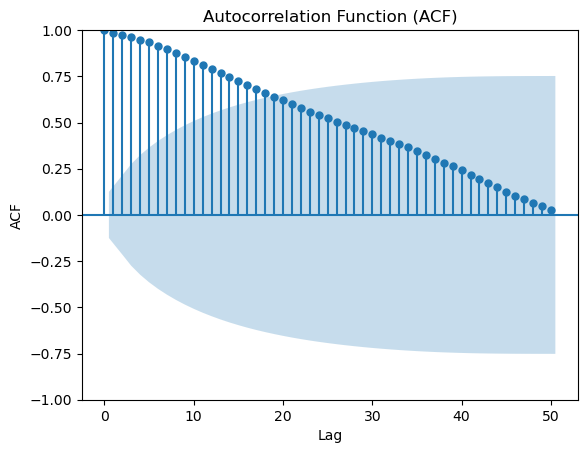

<Figure size 1200x600 with 0 Axes>

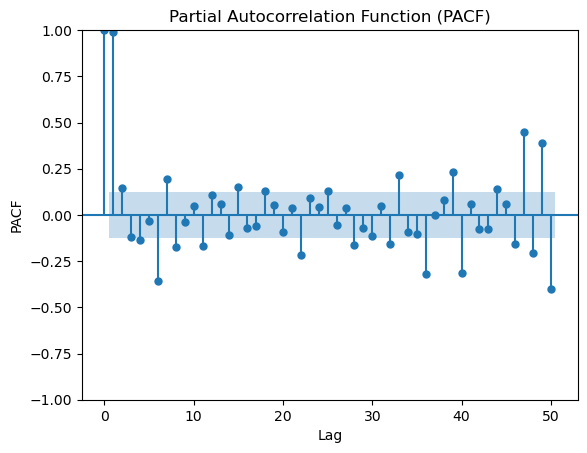

In [90]:
#ACF and PACF for know what model is to get applied 

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(close_prices, lags=50, title='Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(close_prices, lags=50, title='Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

# as the acf is suggesting a trailing edge and the pacf is suggesting an immediate drop so the model we will use 
#for better understanding will be auto regressive 

In [92]:
#plotting ARIMA model 

# Example: Fit ARIMA(1, 1, 1) model
model = ARIMA(close_prices, order=(1, 1, 1))
result = model.fit()

# Print model summary
result.summary()


/Users/charulpatel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/charulpatel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/charulpatel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  246
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1628.947
Date:                Sun, 14 Jul 2024   AIC                           3263.894
Time:                        16:07:24   BIC                           3274.397
Sample:                             0   HQIC                          3268.123
                                - 246                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3512      0.230     -1.525      0.127      -0.802       0.100
ma.L1          0.2400      0.247      0.970      0.332      -0.245       0.725
sigma2      3.489e+04   1667.138     20.926      0.000    3.16e+04    3.82e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               614.65
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               5.59   Skew:                            -1.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/charulpatel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


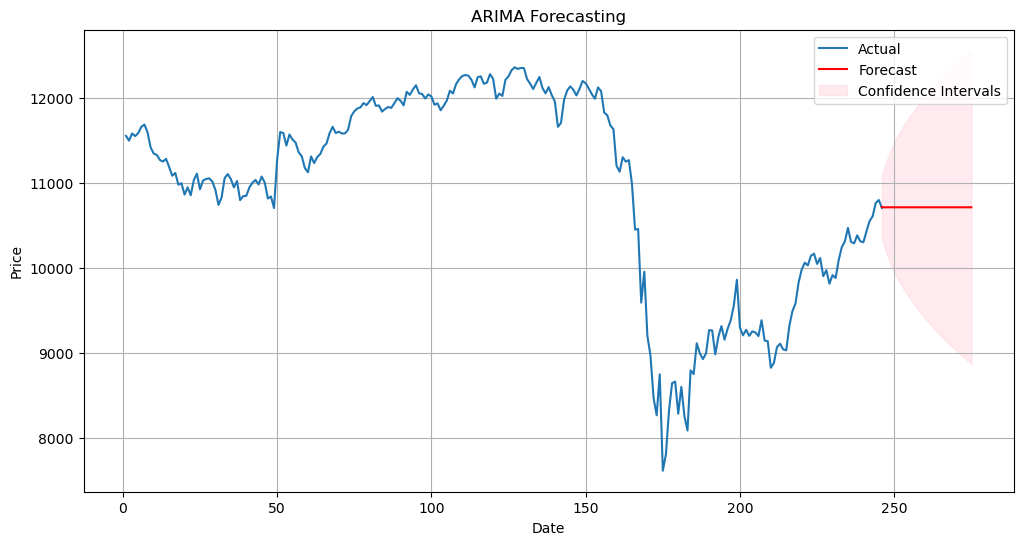

In [100]:
# Forecast future values
forecast_steps = 30  # Number of steps ahead to forecast
forecast = result.get_forecast(steps=forecast_steps)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plotting forecasts
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='Actual')
plt.plot(forecast_values.index, forecast_values.values, color='red', label='Forecast')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

 # Replace with your actual observed values for the forecast period
y_true = np.array(data['Close'][-30:])
y_pred = np.array(forecast_values)  # Using forecasted values from ARIMA model

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Error (MAE): 539.62
Mean Squared Error (MSE): 384057.32
Root Mean Squared Error (RMSE): 619.72
Mean Absolute Percentage Error (MAPE): 5.40%


In [107]:
mape = np.mean(np.abs((y_true - forecast_values) / y_true)) * 100

# Calculate accuracy percentage
accuracy_percentage = 100 - mape

print(f'Percentage Accuracy: {accuracy_percentage:.2f}%')

Percentage Accuracy: 94.60%
